In [16]:
import sys
sys.path.append('..')
from utils import scroll_pages, extract_tag
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dump_path = "../subsample_chunked.xml"

In [3]:
chunks_info = []
with open(dump_path, "r") as f:
    for page in scroll_pages(f):
        page = extract_tag(page, tag="page", add_tag=False)
        page = json.loads(page)
        for chunk in page:
            chunks_info.append({"length": len(chunk["text"]), "titles": chunk["titles"]})

In [18]:
chunk_lenghts = [chunk["length"] for chunk in chunks_info]
chunk_lenghts = np.array(chunk_lenghts)

In [19]:
# compute stats on chunk lengths
print("mean chunk length:", np.mean(chunk_lenghts))
print("std chunk length:", np.std(chunk_lenghts))
print("max chunk length:", np.max(chunk_lenghts))
print("min chunk length:", np.min(chunk_lenghts))
print("median chunk length:", np.median(chunk_lenghts))


mean chunk length: 845.8109122217436
std chunk length: 1050.4691670147342
max chunk length: 188047
min chunk length: 1
median chunk length: 518.0


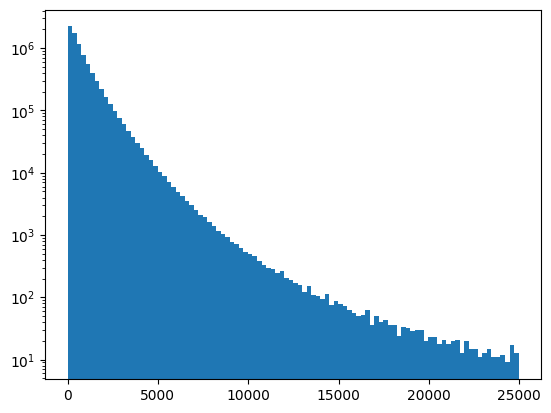

In [41]:
plt.hist(chunk_lenghts[chunk_lenghts < 25000], bins=100)
plt.yscale('log')

In [44]:
print("Number of chunks with more than 25000 characters:", len(chunk_lenghts[chunk_lenghts > 25000]))

Number of chunks with more than 25000 characters: 386


(array([ 49612.,  81365.,  69493.,  67222.,  85488.,  78397.,  80825.,
         82032.,  88713.,  93188.,  92131.,  95224.,  94749.,  99285.,
        101943., 103697., 104605., 102676., 103272.,  97930.,  94884.,
         93231.,  91627.,  89185.,  87518.,  86536.,  84900.,  83151.,
         82077.,  80804.,  79124.,  77742.,  76897.,  75315.,  73540.,
         73198.,  70604.,  70547.,  69134.,  67781.,  66298.,  65488.,
         64463.,  63417.,  61879.,  60866.,  59924.,  58539.,  58152.,
         51001.,  56237.,  54913.,  53897.,  53617.,  52517.,  51418.,
         50418.,  49848.,  48591.,  48267.,  47267.,  46024.,  45914.,
         45031.,  44247.,  43875.,  42913.,  42418.,  41746.,  40930.,
         40456.,  39585.,  39143.,  38300.,  37863.,  37287.,  36659.,
         36609.,  35881.,  34793.,  34215.,  34157.,  33588.,  33067.,
         32370.,  32286.,  32120.,  31212.,  30950.,  30254.,  29865.,
         29685.,  29312.,  28730.,  28369.,  27848.,  27601.,  27250.,
      

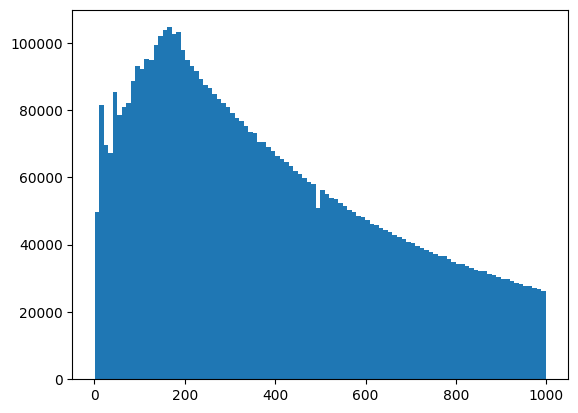

In [46]:
plt.hist(chunk_lenghts[chunk_lenghts < 1000], bins=100)